# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_response
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $74509.20
The current value of your 5.3 ETH is $24464.32


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2")

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2021-06-25", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
investment_portfolio = alpaca.get_barset(tickers, timeframe, end=today, limit=1000).df.sort_index(ascending=False)

# Preview DataFrame
investment_portfolio.head()

AGG                                        \
                             open     high       low   close     volume   
time                                                                      
2021-06-25 00:00:00-04:00  115.11  115.130  114.7516  114.89  3987588.0   
2021-06-24 00:00:00-04:00  115.10  115.170  115.0450  115.07  6672880.0   
2021-06-23 00:00:00-04:00  115.06  115.138  114.9900  115.05  5000374.0   
2021-06-22 00:00:00-04:00  114.83  115.140  114.8300  115.11  5299846.0   
2021-06-21 00:00:00-04:00  115.06  115.120  114.9210  114.96  4934966.0   

                              SPY                                        
                             open      high     low   close      volume  
time                                                                     
2021-06-25 00:00:00-04:00  425.90  427.0943  425.55  426.57  50460394.0  
2021-06-24 00:00:00-04:00  424.89  425.5500  424.62  425.09  39863529.0  
2021-06-23 00:00:00-04:00  423.19  424.0500  422.51  422.60  41476351.0  
2021-06-22 00:00:00-04:00  420.85  424.0000  420.08  423.06  50857233.0  
2021-06-21 00:00:00-04:00  416.80  421.0600  415.93  420.85  63727942.0

In [9]:
# Pick AGG and SPY close prices
agg_close_price = investment_portfolio["AGG"]["close"][0]
spy_close_price = investment_portfolio["SPY"]["close"][0]
agg_close_price

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.89
Current SPY closing price: $426.57


In [10]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21328.50
The current value of your 200 AGG shares is $22978.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000



# Create savings DataFrame
crypto = my_btc_value + my_eth_value
shares = my_agg_value + my_spy_value
savings = [crypto, shares]


df_savings = pd.DataFrame(savings, index=["crypto", "shares"], columns=["amount"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,98973.523
shares,44306.500


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

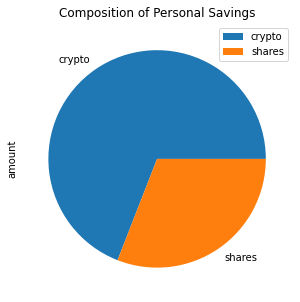

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", figsize=(10,5), title="Composition of Personal Savings")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())

# Validate saving health
if total_savings > emergency_fund:
    print("Hooray! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Omg! You just have enough money in your emergency fund!")
else:
    print(f"Aiya! You are ${(emergency_fund - total_savings):0.2f} away from your emergency fund savings goal. Start making more money lah!")

Hooray! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

df_stock_data = alpaca.get_barset(tickers, timeframe, start=start_date, end=end_date, limit=1000).df
# Display sample data
df_stock_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30yr = MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.40, .60],
    num_simulation=500,
    num_trading_days=252*30
)

In [17]:
# Printing the simulation input data
MC_30yr.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.988853,1.003347,1.015990,1.009147,1.017521,1.010373,1.003916,0.997230,1.009749,1.002130,...,1.009554,0.995254,1.001588,0.998482,0.989996,1.009736,0.995429,1.001408,0.995898,0.991973
2,0.992572,1.002456,1.019776,1.016678,1.014132,1.007151,1.009709,1.006090,1.022099,1.008396,...,1.020911,0.989447,0.994676,0.995967,1.000203,1.008573,0.999468,1.011384,1.014531,0.980242
3,0.987164,1.010747,1.024831,1.019006,1.016399,1.005457,1.010391,1.018551,1.028286,1.012887,...,1.010007,0.991125,1.001446,0.993326,0.995116,1.028465,0.998582,1.010372,1.021444,0.974596
4,0.985667,1.025337,1.035234,1.018723,1.005757,1.019857,1.027197,1.014522,1.034530,1.012240,...,1.010688,0.990341,1.003730,0.984649,0.994626,1.026628,0.992168,1.001511,1.020168,0.964841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,15.290639,12.397278,11.332436,48.678841,9.402858,11.784563,31.166780,17.580982,66.346501,12.931100,...,35.450753,26.628002,12.878216,31.736611,13.946649,16.946894,12.351613,28.073211,4.431793,16.638236
7557,15.108278,12.412789,11.357948,48.373509,9.423373,11.662498,31.069961,17.547051,65.966372,13.017850,...,35.334778,26.346504,12.796842,31.647656,13.859748,17.028751,12.494174,27.580949,4.465393,16.489663
7558,15.142778,12.475837,11.254726,48.328467,9.362490,11.787764,31.852406,17.704701,66.435378,12.904880,...,34.927974,26.591667,12.804627,31.632232,13.837065,17.123246,12.467402,27.806938,4.450484,16.351137
7559,14.915451,12.442328,11.164567,47.782767,9.448735,11.873110,32.146241,17.557037,65.949270,12.951591,...,34.908473,26.536693,12.785841,32.091008,13.863455,17.203942,12.422637,27.919018,4.415529,16.468055


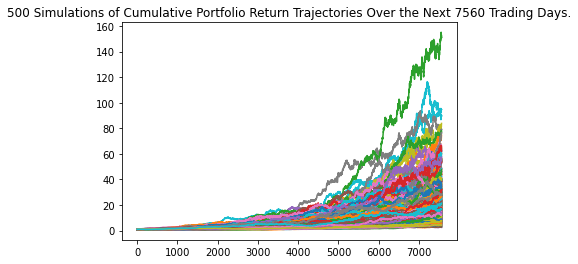

In [19]:
# Plot simulation outcomes
line_plot_30yr = MC_30yr.plot_simulation()

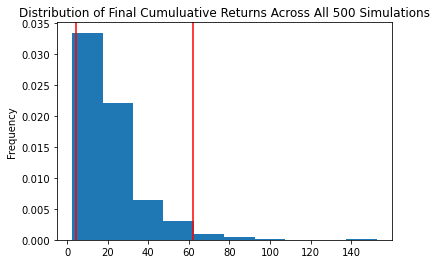

In [20]:
# Plot probability distribution and confidence intervals
distribution_plot_30yr = MC_30yr.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
summ_stats = MC_30yr.summarize_cumulative_return()

# Print summary statistics
print(summ_stats)

count           500.000000
mean             21.725258
std              16.018966
min               2.502852
25%              11.388703
50%              17.420773
75%              27.772012
max             152.462661
95% CI Lower      4.384995
95% CI Upper     62.076455
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round((summ_stats[8] * initial_investment), 2)
ci_upper = round((summ_stats[9] * initial_investment), 2) 

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $87699.9 and $1241529.11


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round((summ_stats[8] * initial_investment), 2)
ci_upper = round((summ_stats[9] * initial_investment), 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $131549.85 and $1862293.66


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5yr = MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.05, .95],
    num_simulation=500,
    num_trading_days=252*5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.014570,0.984308,0.992392,0.997630,0.986851,1.004559,1.010934,1.002881,1.020020,1.002376,...,0.992482,1.000712,1.009634,1.004400,1.004691,1.018820,1.000669,1.007054,0.995953,1.001125
2,1.023833,0.981082,0.982019,1.005693,1.005551,1.004395,0.998213,1.008915,1.040278,1.023642,...,1.031883,0.992245,0.999503,0.995193,1.013561,1.010430,0.983837,1.012264,1.005519,0.995666
3,1.014575,0.991853,0.988470,1.004406,0.997192,1.010923,1.022276,1.001638,1.034084,1.031214,...,1.016661,1.002070,1.003973,1.005548,1.018108,1.010216,0.980484,1.010528,1.005663,1.008410
4,1.025373,0.979335,0.985979,1.005437,1.001078,1.002689,1.011751,1.001692,1.057392,1.035125,...,0.993571,1.012627,1.009698,1.018500,1.015658,1.003607,0.981442,0.984947,1.017846,1.012413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.899824,2.476689,3.787003,1.702053,0.990990,1.612464,4.306583,1.592000,1.393877,3.564991,...,3.436751,1.660708,2.232630,1.201024,2.250618,1.908123,1.541317,3.937418,6.479776,0.524948
1257,1.907389,2.488689,3.816407,1.727748,0.987043,1.589172,4.360577,1.614875,1.395211,3.649933,...,3.424600,1.663797,2.249541,1.217214,2.249399,1.943360,1.540270,3.953781,6.500352,0.533840
1258,1.913455,2.472810,3.835671,1.724818,0.986537,1.619125,4.342139,1.556604,1.355072,3.697853,...,3.424795,1.659294,2.250430,1.253666,2.278256,1.963803,1.530948,4.004679,6.496546,0.534319
1259,1.944802,2.455033,3.826549,1.713139,0.985125,1.666225,4.335962,1.531000,1.378728,3.706228,...,3.540058,1.684909,2.291943,1.246487,2.286111,2.015960,1.545159,4.004409,6.649018,0.517901


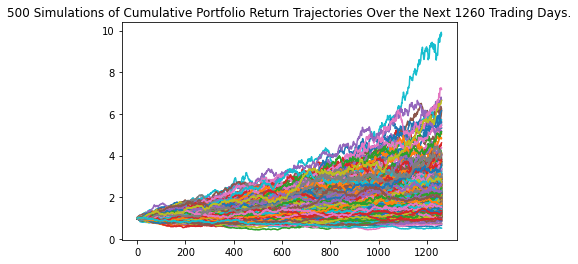

In [26]:
# Plot simulation outcomes
line_plot_5yr = MC_5yr.plot_simulation()

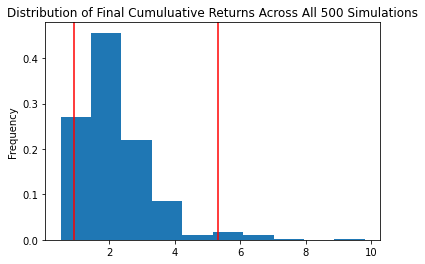

In [27]:
# Plot probability distribution and confidence intervals
distribution_plot_5yr = MC_5yr.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
summ_stats_5yr = MC_5yr.summarize_cumulative_return()

# Print summary statistics
print(summ_stats_5yr)

count           500.000000
mean              2.195905
std               1.092265
min               0.518296
25%               1.444057
50%               1.966569
75%               2.623716
max               9.810763
95% CI Lower      0.916836
95% CI Upper      5.332627
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round((summ_stats_5yr[8] * initial_investment), 2)
ci_upper_five = round((summ_stats_5yr[9] * initial_investment), 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $55010.14 and $319957.64


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10yr = MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.10, .90],
    num_simulation=500,
    num_trading_days=252*10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009631,0.992185,1.009354,1.002367,0.997388,1.000560,0.997804,0.977019,0.999427,1.017085,...,1.007151,1.006082,0.998334,0.990459,0.981244,0.989440,0.992579,0.994748,1.008806,0.998887
2,1.004793,1.009861,1.021157,0.998779,0.992679,0.999617,0.980000,0.935260,1.018547,1.023757,...,0.999941,1.014093,0.987628,0.993187,0.989422,0.972307,1.007822,0.994012,1.006789,0.984478
3,1.039785,1.012645,1.024989,1.012078,0.988713,1.011675,0.974425,0.933730,1.002496,1.028419,...,1.002147,1.011735,0.991781,0.975210,0.987278,0.983643,1.031457,1.010185,0.990520,0.983911
4,1.049283,1.004183,1.013711,1.016977,0.993853,1.017394,0.999444,0.920922,1.004888,1.024788,...,0.998315,1.033126,0.997268,0.957607,0.974036,0.972152,1.026679,0.990074,0.988712,0.981843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,5.444002,5.853979,3.300632,2.819227,5.769107,5.205588,4.493314,6.357874,3.625503,1.940957,...,4.296626,3.642856,9.440771,5.354737,4.249651,3.506761,3.524540,7.926015,2.400844,4.891715
2517,5.404152,5.904461,3.306378,2.814072,5.764004,5.157067,4.484981,6.241068,3.551834,1.942681,...,4.257848,3.549825,9.340273,5.289772,4.267261,3.505655,3.628268,7.962313,2.390265,4.858132
2518,5.362192,5.856860,3.264988,2.786696,5.786666,5.157413,4.532038,6.384839,3.617220,1.968078,...,4.175067,3.543648,9.420829,5.281651,4.226475,3.559034,3.660528,7.898806,2.356730,4.877298
2519,5.499711,5.894366,3.245996,2.763375,5.659805,5.114051,4.506792,6.405452,3.701383,1.954035,...,4.244224,3.513698,9.373070,5.334880,4.246901,3.570688,3.620818,8.176088,2.400880,4.803934


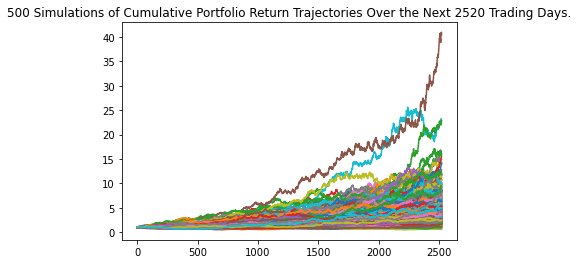

In [32]:
# Plot simulation outcomes
line_plot_10yr = MC_10yr.plot_simulation()

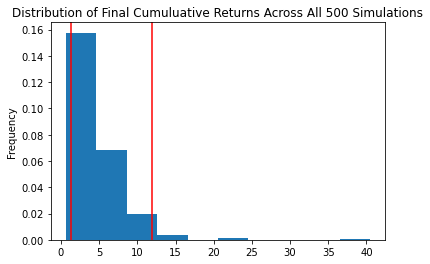

In [33]:
# Plot probability distribution and confidence intervals
distribution_plot_10yr = MC_10yr.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
summ_stats_10yr = MC_10yr.summarize_cumulative_return()

# Print summary statistics
print(summ_stats_10yr)

count           500.000000
mean              4.663457
std               3.381279
min               0.637772
25%               2.589707
50%               3.793530
75%               5.701622
max              40.481689
95% CI Lower      1.302024
95% CI Upper     11.932398
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round((summ_stats_10yr[8] * initial_investment), 2)
ci_upper_ten = round((summ_stats_10yr[9] * initial_investment), 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $78121.42 and $715943.89
